# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   
    #print(city_url)
    
    #break
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

     

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | vilyuysk
Processing Record 3 of Set 1 | staroshcherbinovskaya
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | albertina
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | shakawe
Processing Record 11 of Set 1 | long beach
Processing Record 12 of Set 1 | luanda
Processing Record 13 of Set 1 | antsiranana
Processing Record 14 of Set 1 | chernyshevsk
Processing Record 15 of Set 1 | velizh
Processing Record 16 of Set 1 | kristiansund
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | val

Processing Record 39 of Set 4 | klyuchi
Processing Record 40 of Set 4 | pangoa
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | phan rang-thap cham
Processing Record 43 of Set 4 | nambucca heads
Processing Record 44 of Set 4 | alaghsas
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | castillos
Processing Record 47 of Set 4 | yongchuan
Processing Record 48 of Set 4 | barcelos
Processing Record 49 of Set 4 | karratha
Processing Record 0 of Set 5 | utrik
Processing Record 1 of Set 5 | brookings
Processing Record 2 of Set 5 | huarmey
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | colonia
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | onega
Processing Record 8 of Set 5 | zheleznogorsk-ilimskiy
Processing Record 9 of Set 5 | guiren
Processing Record 10 of Set 5 | berdyansk
Processing Record 11 of Set 5 | ubari
Processing Record 12 of Set 5 | sisi

Processing Record 31 of Set 8 | n'zeto
Processing Record 32 of Set 8 | namtsy
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | carnarvon
Processing Record 35 of Set 8 | leua
Processing Record 36 of Set 8 | hede
Processing Record 37 of Set 8 | oriximina
Processing Record 38 of Set 8 | nar'yan-mar
Processing Record 39 of Set 8 | allapalli
Processing Record 40 of Set 8 | dolni chiflik
Processing Record 41 of Set 8 | pizarro
Processing Record 42 of Set 8 | kourou
Processing Record 43 of Set 8 | virginia beach
Processing Record 44 of Set 8 | ayaguz
City not found. Skipping...
Processing Record 45 of Set 8 | al kharijah
Processing Record 46 of Set 8 | laojunmiao
Processing Record 47 of Set 8 | kargasok
Processing Record 48 of Set 8 | mahajanga
Processing Record 49 of Set 8 | znamenskoye
Processing Record 0 of Set 9 | saint-joseph
Processing Record 1 of Set 9 | hayma'
City not found. Skipping...
Processing Record 2 of Set 9 | porto novo
Processing Record 3 of Set 9 | h

Processing Record 23 of Set 12 | north bay
Processing Record 24 of Set 12 | ixtapa
Processing Record 25 of Set 12 | kingscliff
Processing Record 26 of Set 12 | machico
Processing Record 27 of Set 12 | bundibugyo
Processing Record 28 of Set 12 | teknaf
Processing Record 29 of Set 12 | kudymkar
Processing Record 30 of Set 12 | nova sintra
Processing Record 31 of Set 12 | kaiapoi
Processing Record 32 of Set 12 | ruteng
Processing Record 33 of Set 12 | akranes
Processing Record 34 of Set 12 | konarka
Processing Record 35 of Set 12 | toba tek singh
Processing Record 36 of Set 12 | el matama
Processing Record 37 of Set 12 | basciftlik
Processing Record 38 of Set 12 | tibanbang
Processing Record 39 of Set 12 | dompu
Processing Record 40 of Set 12 | sao vicente
Processing Record 41 of Set 12 | nieuw amsterdam
Processing Record 42 of Set 12 | pingzhuang
Processing Record 43 of Set 12 | aberystwyth
Processing Record 44 of Set 12 | aquin
Processing Record 45 of Set 12 | pandan
Processing Record 4

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,25.39,94,0,1.54,MP,1697316133
1,vilyuysk,63.7553,121.6247,-5.47,63,11,2.40,RU,1697316330
2,staroshcherbinovskaya,46.6311,38.6742,16.77,47,0,3.02,RU,1697316330
3,grytviken,-54.2811,-36.5092,-3.02,86,43,3.42,GS,1697316330
4,albertina,-22.2008,-46.6158,20.96,85,100,1.16,BR,1697316330


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,25.39,94,0,1.54,MP,1697316133
1,vilyuysk,63.7553,121.6247,-5.47,63,11,2.40,RU,1697316330
2,staroshcherbinovskaya,46.6311,38.6742,16.77,47,0,3.02,RU,1697316330
3,grytviken,-54.2811,-36.5092,-3.02,86,43,3.42,GS,1697316330
4,albertina,-22.2008,-46.6158,20.96,85,100,1.16,BR,1697316330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

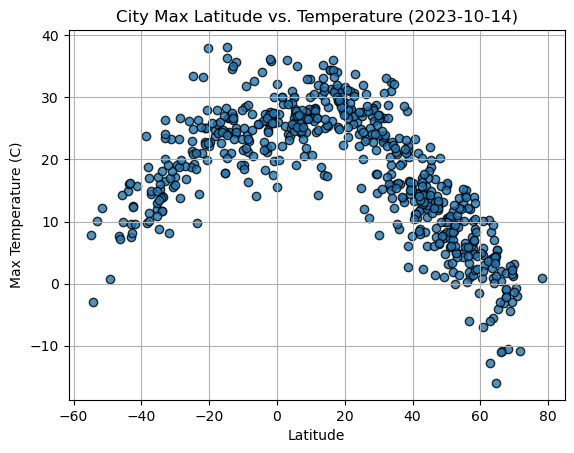

In [11]:
# Build scatter plot for latitude vs. temperature # same as cell below
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

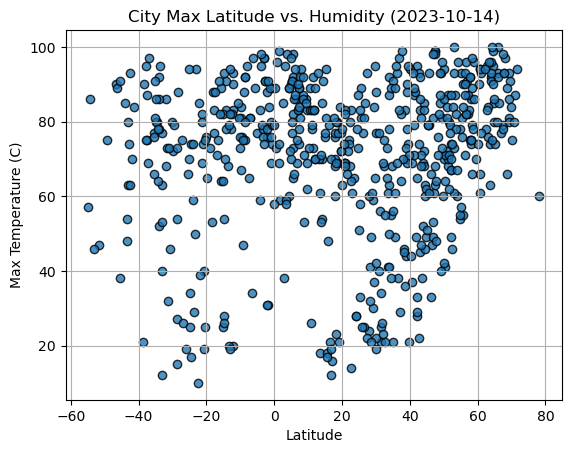

In [12]:
# Build scatter plot for latitude vs. Humidity #same as below
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

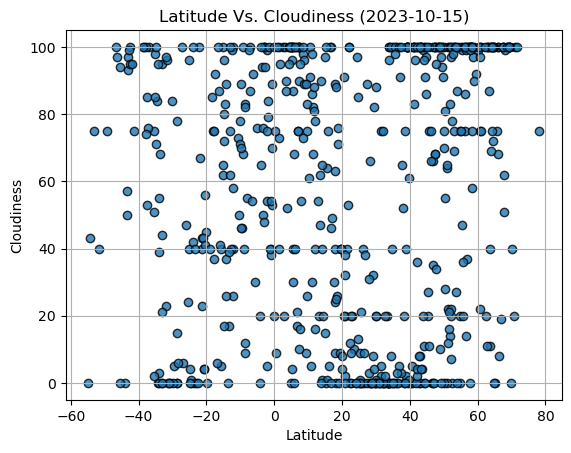

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title(("Latitude Vs. Cloudiness (%s)") % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

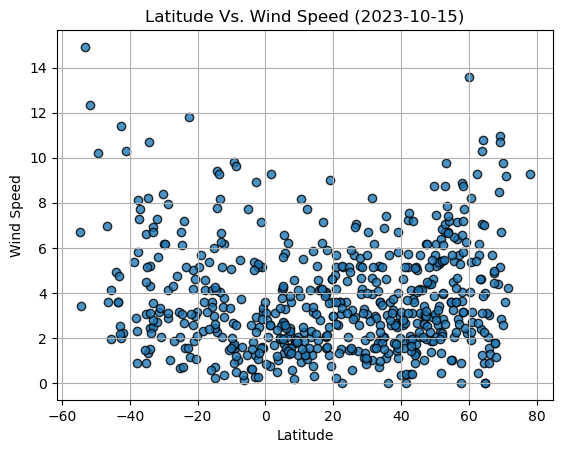

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(    
   city_data_df["Lat"],
   city_data_df["Wind Speed"],
   edgecolor="black",
   linewidths=1,
   marker="o",
   alpha=0.8,
   label="Cities"
)

# Incorporate the other graph properties
plt.title(("Latitude Vs. Wind Speed (%s)") % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [29]:
# Define a function to create Linear Regression plot
def linear_regression_plot(x_values,y_values,title,text_coordinates):
    
    #Run linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel('Bank Count')

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nhemisphere_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
nhemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,25.39,94,0,1.54,MP,1697316133
1,vilyuysk,63.7553,121.6247,-5.47,63,11,2.40,RU,1697316330
2,staroshcherbinovskaya,46.6311,38.6742,16.77,47,0,3.02,RU,1697316330
7,shingu,33.7333,135.9833,17.60,92,100,1.89,JP,1697316331
8,georgetown,5.4112,100.3354,27.23,92,40,2.68,MY,1697316116


In [33]:
# MY DATA IS DIFFERENT THAN CELL BELOW
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
shemisphere_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
shemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,-3.02,86,43,3.42,GS,1697316330
4,albertina,-22.2008,-46.6158,20.96,85,100,1.16,BR,1697316330
5,adamstown,-25.0660,-130.1015,21.30,70,96,0.66,PN,1697316098
6,port elizabeth,-33.9180,25.5701,14.06,92,55,2.43,ZA,1697316092
9,shakawe,-18.3667,21.8500,23.80,53,85,2.30,BW,1697316331


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)


# Display sample data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.8596991933103941


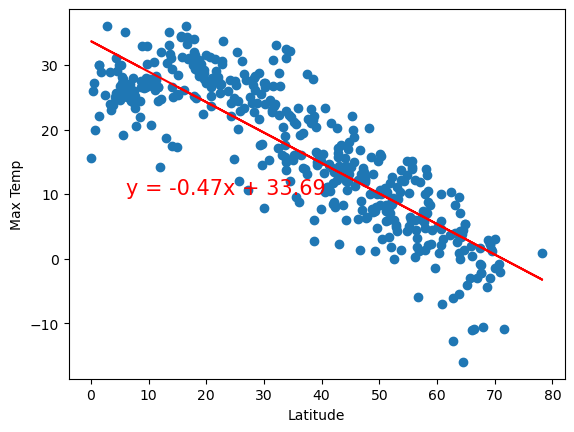

In [46]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = nhemisphere_df["Lat"].astype("float")
y_values = nhemisphere_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

r-value: 0.7143343308327268


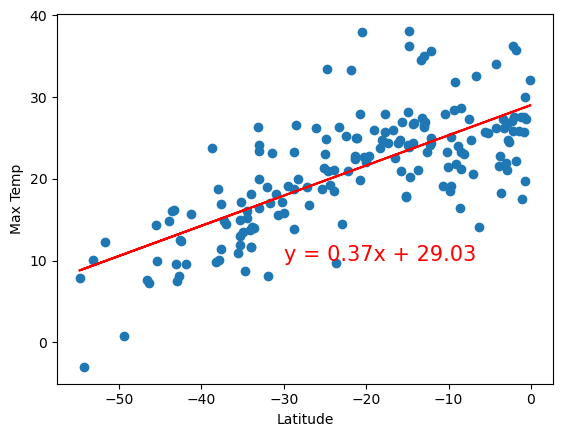

In [54]:
## Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = shemisphere_df["Lat"].astype("float")
y_values = shemisphere_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.1540509694369046


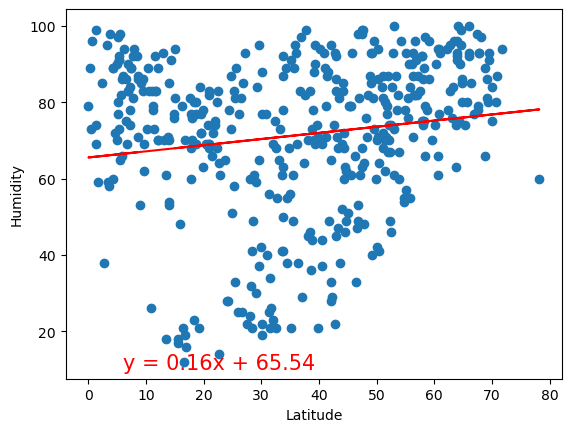

In [47]:
# Northern Hemisphere
x_values = nhemisphere_df["Lat"].astype("float")
y_values = nhemisphere_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

r-value: 0.12971746364856326


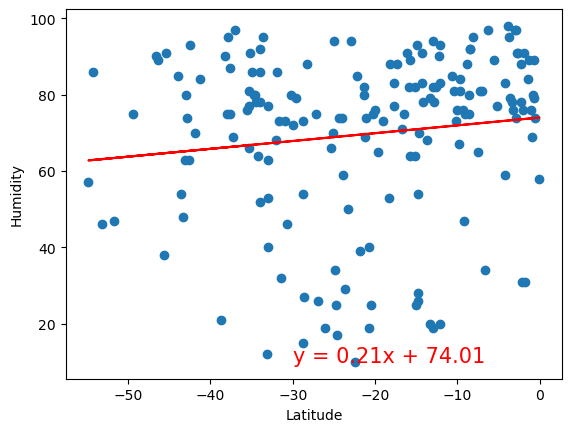

In [53]:
# Southern Hemisphere
x_values = shemisphere_df["Lat"].astype("float")
y_values = shemisphere_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** A linear relationship describes how two sets of values relate to each other.  In the above plot for example, the slight positive correlation (r being slightly positive), describes how as the latitude increases, there is a very slight chance the humidity will increase as well.  Once it goes above .5 then the relationship is strong, .7 is very strong.  The relationship can be positively correlated, negatively correlated, or not correlated at all.  

In the northern hemisphere however, the correlation is at about .5, so there is a strong positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.16109166232986222


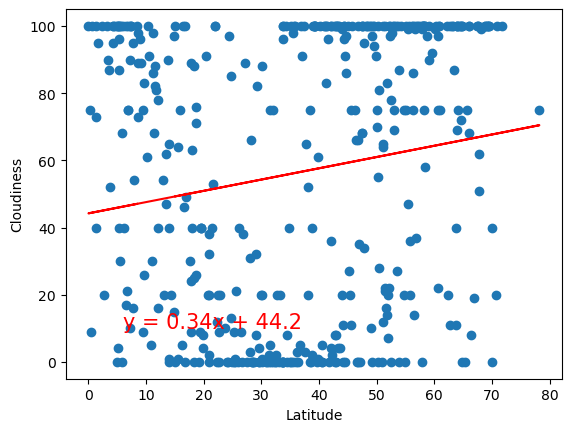

In [55]:
# Northern Hemisphere
x_values = nhemisphere_df["Lat"].astype("float")
y_values = nhemisphere_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

r-value: 0.12971746364856326


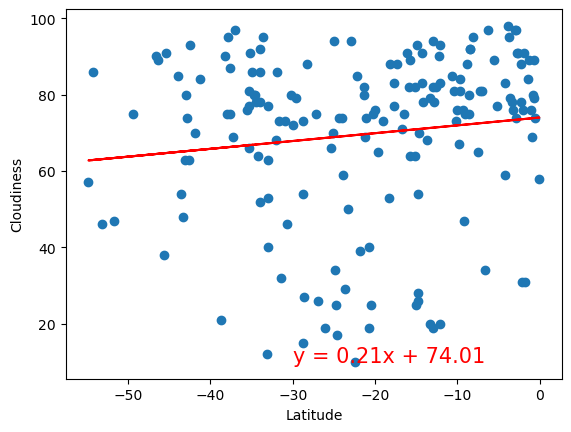

In [57]:
# Southern Hemisphere
x_values = shemisphere_df["Lat"].astype("float")
y_values = shemisphere_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positve correlation with latitude and cloudiness.  In the north espectially since it is higher at .34, and in the south at about .21.  In other words the higher the latitude, it gets a bit more cloudy.  

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.28233371400479507


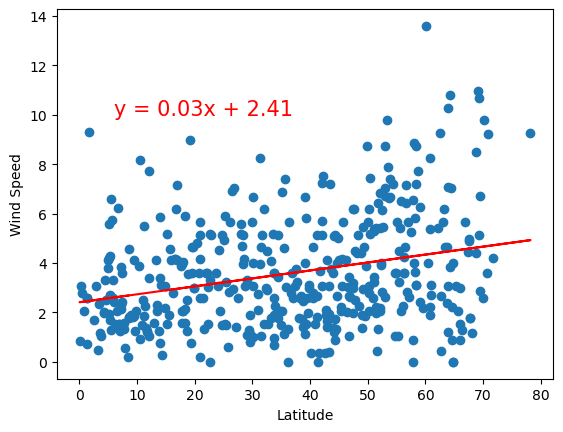

In [58]:
# Northern Hemisphere
x_values = nhemisphere_df["Lat"].astype("float")
y_values = nhemisphere_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

r-value: -0.3071338950576002


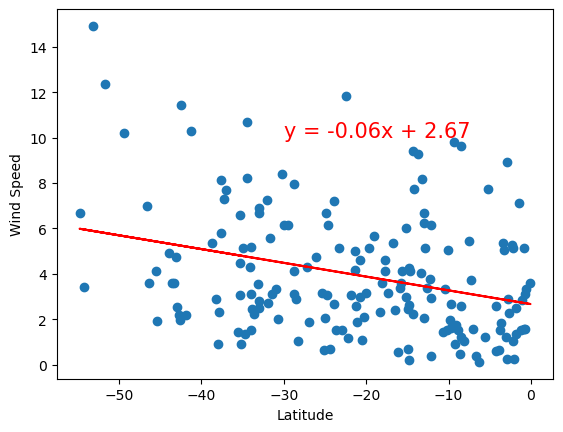

In [59]:
# Southern Hemisphere
x_values = shemisphere_df["Lat"].astype("float")
y_values = shemisphere_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r value
print(f"r-value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the north there is a very weak positive correlation between latitude and windspeed, and in the south, a ver weak negative correlation.  